# Regression in Python

<br>

This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.

<br>
<br>

<img width=600 height=500 src="https://imgs.xkcd.com/comics/sustainable.png"/>

<br>
<br>

**Libraries**

In [ ]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from matplotlib import rcParams

# special matplotlib arguments for plots
sns.set_style("darkgrid")
sns.set_context("poster")


## Part 1: Introduction to Linear Regression



### Purpose of linear regression

<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

<br>
<br>

### A Brief Mathematical Recap

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 

<br>
<br>

### Estimating $\hat\beta$: Least squares

[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

<br>
<br>

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

<br>
<br>

## Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 

<br>
<br>

### Load the Boston Housing data set from `sklearn`

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [ ]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [ ]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [ ]:
print(boston.target.shape)

(506,)


In [ ]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br>
<br>

### EDA and Summary Statistics

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [ ]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<br>
<br>

### Part 2 Checkup Exercise Set I

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).

<br>

**Exercise:** What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?


**Response: Per Capita Crime Rate (CRIM) & House Prices (PRICE)**

The graph below suggests an inverse and non-linear relationship between house prices and crime rates; as the crime rates increase, the house prices tend to decline non-linearly, akin to a relationsip $y = exp^{-ax}$ wherein $a$ is an unknown constant, $x$ is the crime rate, and y is the price.  However, this is not generally true; the top left corner of the graph suggest that 


*   above a certain price a non-linear, or otherwise, relationship is not discernible between the variables.
*   some relatively expensive houses are in areas that have high per capita crime rate compared to similarly priced houses; outliers.

<br>


Text(0.5, 1.0, 'Relationship between CRIM and PRICE')

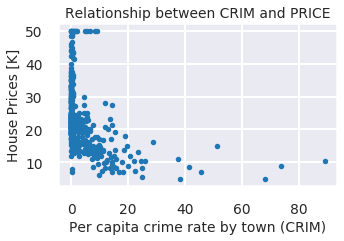

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.CRIM, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("Per capita crime rate by town (CRIM)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between CRIM and PRICE", fontsize='xx-small')

<br>
<br>

**Exercise:** Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

**Response: Average Number of Rooms per Dwelling (RM) & House Prices (PRICE)** 

In the case of RM & PRICE, illustrated below, 

* The relationship might be weakly or moderately positively linear; a regression line through the points will require a wide uncertanity band - houses with a similar number of rooms have quite varying prices.  

* There are quite a few outliers. 

* Most dwellings seem to have between 5 and 7 rooms.

Text(0.5, 1.0, 'Relationship between RM and PRICE')

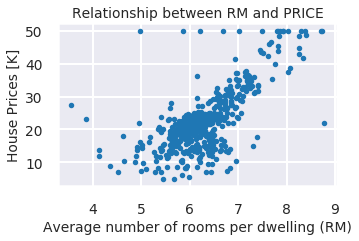

In [ ]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.RM, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("Average number of rooms per dwelling (RM)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between RM and PRICE", fontsize='xx-small')

<br>
<br>

**Response: Pupil/Teacher Ratio by Town (PTRATIO) & House Prices (PRICE)** 

In this case, illustrated below, a relationship is not quite discernible to the naked-eye.  There might be a weak negatively-linear relationship; a linear correlation measure will be helpful.


Text(0.5, 1.0, 'Relationship between PTRATIO & PRICE')

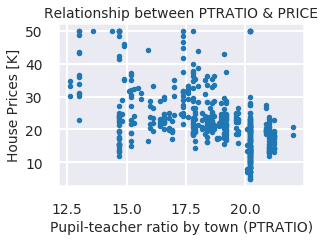

In [ ]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(4.4,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.PTRATIO, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between PTRATIO & PRICE", fontsize='xx-small')

<br>
<br>

**Exercise:** What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

**Response: % Lower Status of the Population (LSTAT) & House Prices (PRICE)** 

Studies such as [Council tax valuation bands, socio-economic status and health outcome](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1513204/) have reported relationships between property values and socio-economic status.  The graph below suggests a non-linear, exponentially decaying, relationship between price and the percentage of the population classed as low status, i.e., prices decrease, non-linearly, as the lower status percentage increases.

Text(0.5, 1.0, 'Relationship between LSTAT and PRICE')

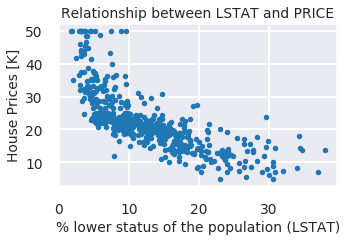

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.LSTAT, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("% lower status of the population (LSTAT)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between LSTAT and PRICE", fontsize='xx-small')

<br>
<br>

**Response: Nitric Oxides Concentration (NOX) & House Prices (PRICE)** 

Nitric oxides are used as a [measure of air pollution](https://naei.beis.gov.uk/overview/pollutants?pollutant_id=6). And because studies such as [The True Cost of Air Pollution: Evidence from House Prices and Migration](https://heep.hks.harvard.edu/files/heep/files/dp69_sullivan.pdf) highlight an inverse relationship between pollution and house prices, the Boston data relationship, if any, is of interest.  

If there is a relationship between price and nitric oxide concentrations, it is either

* a negative non-linear relationship, or
* a moderately negative linear relationship


Text(0.5, 1.0, 'Relationship between NOX and PRICE')

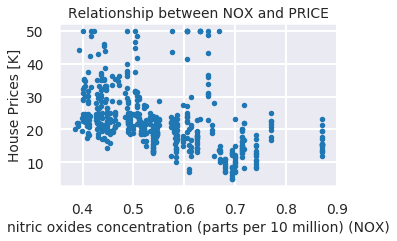

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.NOX, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("nitric oxides concentration (parts per 10 million) (NOX)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between NOX and PRICE", fontsize='xx-small')

<br>
<br>

**Response: Index of Accessibility to Radial Highways (RAD) & House Prices (PRICE)** 

The [relationship between accessibility to highways and price is sometimes of interest](https://link.springer.com/article/10.1007/s11116-015-9580-7), depending on how a highway in question serves its proximal cities and towns, and depending on the effects of traffic intensity, air pollution, and noise pollution.  There is no obvious relationship between PRICE & RAD below.

Text(0.5, 1.0, 'Relationship between RAD and PRICE')

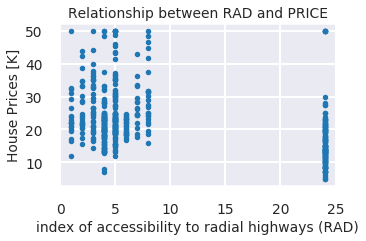

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.scatter(bos.RAD, bos.PRICE, s=(rcParams['lines.markersize'] ** 1))
plt.xlabel("index of accessibility to radial highways (RAD)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')
plt.title("Relationship between RAD and PRICE", fontsize='xx-small')

<br>
<br>

### Scatterplots using Seaborn

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

Text(0, 0.5, 'House Prices [K]')

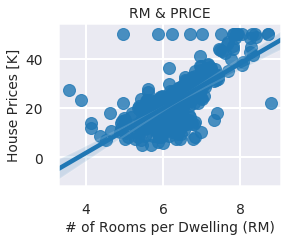

In [ ]:
# Edited
plt.figure(figsize=(4,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("RM & PRICE", fontsize='xx-small')
plt.xlabel("# of Rooms per Dwelling (RM)", fontsize='xx-small')
plt.ylabel("House Prices [K]", fontsize='xx-small')

<br>
<br>

### Histograms

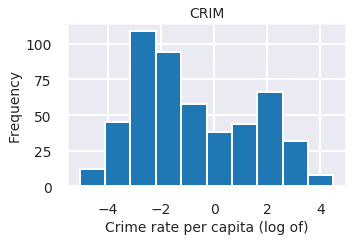

In [ ]:
# Edited
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.hist(np.log(bos.CRIM))
plt.title("CRIM", fontsize='xx-small')
plt.xlabel("Crime rate per capita (log of)", fontsize='xx-small')
plt.ylabel("Frequency", fontsize='xx-small')
plt.show()

### Part 2 Checkup Exercise Set II

<br>

<div class="span5 alert alert-info">
<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?</p>
</div>

**Response: Log Transformations**

Log transformations make it easier to detect and/or visualise highly skewed data; the other purposes that transformations are considered for are [contentious](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/).

In this instance, the log transformation makes it easier to observe that a large proportion of the crime percentage values are within the [0 1.0) percent range; the truncated scatter plot further below also illustrates this.

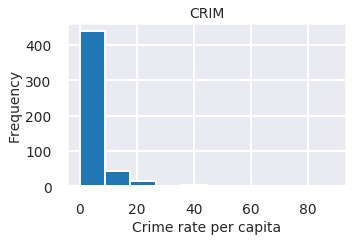

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.hist(bos.CRIM)
plt.title("CRIM", fontsize='xx-small')
plt.xlabel("Crime rate per capita", fontsize='xx-small')
plt.ylabel("Frequency", fontsize='xx-small')
plt.show()

The number of records: 506
The percentage of records that have a crime per capita value below 1.00%: 65.61%
 


Text(0, 0.5, 'Crime rate per capita (CRIM)')

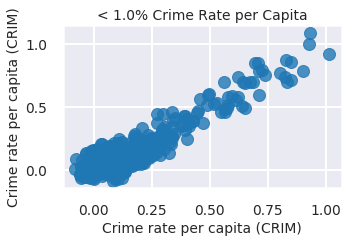

In [ ]:
less_than_one = bos[bos.CRIM < 1]
print(f"The number of records: {len(bos)}")
print(f"The percentage of records that have a crime per capita value below 1.00%: {100*len(less_than_one)/len(bos):.2f}%")
print(f" ")
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(y="CRIM", x="CRIM", data=less_than_one, fit_reg = False, x_jitter=.1, y_jitter=.1)
plt.title("< 1.0% Crime Rate per Capita", fontsize='xx-small')
plt.xlabel("Crime rate per capita (CRIM)", fontsize='xx-small')
plt.ylabel("Crime rate per capita (CRIM)", fontsize='xx-small')

<br>
<br>

**Exercise:** Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

**Response:** Pupil/teacher ratio & average number of rooms per dwelling

A correlation is not discernible.

Text(-0.75, 0.5, 'Pupil/Teacher Ratio (PTRATIO)')

<Figure size 360x216 with 0 Axes>

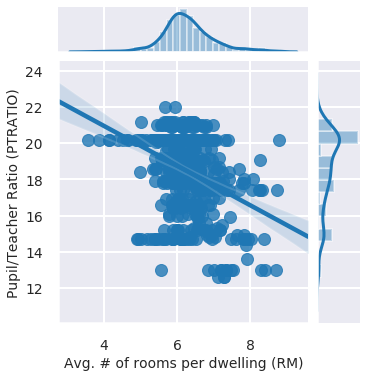

In [ ]:
plt.figure(figsize=(5,3))
sns.jointplot(x='RM', y='PTRATIO', data=bos, kind='reg')
plt.tick_params(axis='both', labelsize='xx-small')
plt.xlabel("Avg. # of rooms per dwelling (RM)", fontsize='xx-small')
plt.ylabel("Pupil/Teacher Ratio (PTRATIO)", fontsize='xx-small')

<br>
<br>

**Response:** Case average number of rooms per dwelling & % low status population.

A non-linear relationship might exist between these two predictors.

Text(-0.75, 0.5, 'Avg. # of rooms per dwelling (RM)')

<Figure size 360x216 with 0 Axes>

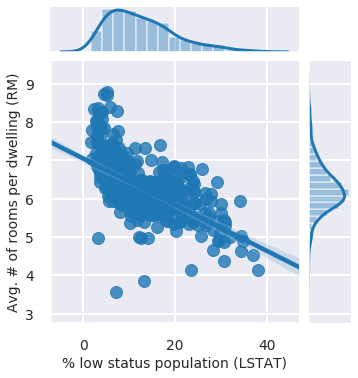

In [ ]:
plt.figure(figsize=(5,3))
sns.jointplot(x='LSTAT', y='RM', data=bos, kind='reg')
plt.tick_params(axis='both', labelsize='xx-small')
plt.xlabel("% low status population (LSTAT)", fontsize='xx-small')
plt.ylabel("Avg. # of rooms per dwelling (RM)", fontsize='xx-small')

<br>
<br>

## Part 3: Linear Regression with Boston Housing Data Example

Here, 

* $Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

* $X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features. 

<br>
<br>

### Fitting Linear Regression using `statsmodels`

[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [ ]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as olsinf
from statsmodels.formula.api import ols

In [ ]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        00:58:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<br>
<br>

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

<br>
<br>

####  `statsmodels` formulas

This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

### Part 3 Checkup Exercise Set I

<br>

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

**Response**

The graph is more or less a mirror image of the **house prices against number of rooms per dwelling** scatter plot; it also mimics the outliers. 

The illustrated relationship does not reflect what we expect if there is a linear relationship between RM & price, or if RM is a sole predictor of price; we expect points scattered closely along the 45 degree line.

Text(0, 0.5, 'Original [K]')

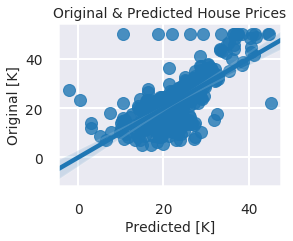

In [ ]:
# your turn
plt.figure(figsize=(4,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=m.fittedvalues, y=bos['PRICE'], scatter=True, fit_reg = True)
plt.title("Original & Predicted House Prices", fontsize='xx-small')
plt.xlabel("Predicted [K]", fontsize='xx-small')
plt.ylabel("Original [K]", fontsize='xx-small')

<br>
<br>

### Fitting Linear Regression using `sklearn`


In [ ]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<br>

#### What can you do with a LinearRegression object? 

Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

<br>

#### What output can you get?

In [ ]:
# Look inside lm object
# lm

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

<br>
<br>

### Fit a linear model

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [ ]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<br>
<br>

### Part 3 Checkup Exercise Set II

<br>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

**Response**

To disable intercept fitting, the expression


```python
lm = LinearRegression()
```

should be replaced with

```python
lm = LinearRegression(fit_intercept=False)
```

In this case, an intercept is recommended because a house might still exists when the value of each feature is zero.  It seems implausible, but sometimes there are collections of empty dwellings within a desolate area of a city or town.


<br>
<br>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

**Response**

No.  In addition to being normally distributed, the residuals must

* have constant variance.  This can be tested via a graph of residuals against predictions; constant variance is denoted by a patternless graph.

* be independent.  The residuals must neither be related nor should they exhibit a trend over time and/or data order. These can be tested via run-sequence and lag plots. 


<br>
<br>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>

**Response**

False.  It is the residuals that should be normally distributed.

<br>
<br>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [ ]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [ ]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


<br>
<br>

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [ ]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<br>
<br>

### Part 3 Checkup Exercise Set III

<br>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

**Response**

The resulting distribution is normally distributed; the probability plot further below supports this observation.  It is centred around 22.533.  This is similar to the mean of the original prices; also ```22.533```.  However, the standard deviation of the predicted values, ```7.91```, differs from the standard deviation of the original prices ```9.197```.  The histograms plot further below illustrates the different spreads of the predicted & original values distributions.

<br>

The histograms plot also illustrates the aforementioned ceiling effect.  The maximum predicted value is ```44.666```.  In general, original values in the [45 50] price range have been under-estimated, and values at the lower end have also been under-estimated.  The histograms plot suggests potential outliers at the low price and high price ends.  This might be due to data collection errors or unknown affecting predictors.

In [ ]:
predicted_prices_stats = stats.describe(lm.predict(X))
predicted_prices_stats

DescribeResult(nobs=506, minmax=(-4.281310709184886, 44.67308338731267), mean=22.53280632411068, variance=62.648536311018326, skewness=0.11071842432057807, kurtosis=0.10343116979617273)

In [ ]:
lm.predict(X).std()

7.90725774048344

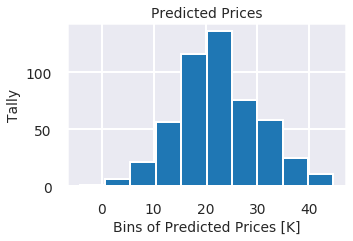

In [ ]:
# your turn
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
plt.hist(lm.predict(X))
plt.title("Predicted Prices", fontsize='xx-small')
plt.xlabel("Bins of Predicted Prices [K]", fontsize='xx-small')
plt.ylabel("Tally", fontsize='xx-small')
plt.show()

<function matplotlib.pyplot.show>

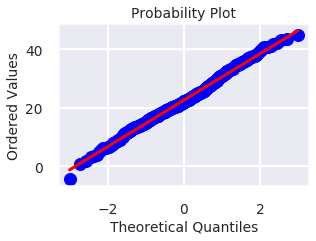

In [ ]:
plt.figure(figsize=(4.5,3))
plt.tick_params(axis='both', labelsize='xx-small')
stats.probplot(lm.predict(X), dist='norm', fit=True, plot=plt)
plt.title("Probability Plot", fontsize='xx-small')
plt.xlabel("Theoretical Quantiles", fontsize='xx-small')
plt.ylabel("Ordered Values", fontsize='xx-small')
plt.show

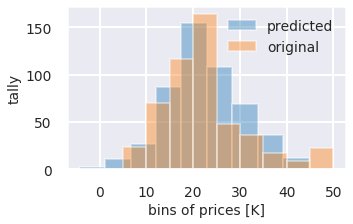

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.distplot(lm.predict(X), bins=9,  kde=False, label='predicted')
sns.distplot(bos['PRICE'], bins=9,  kde=False, label='original')
plt.xlabel("bins of prices [K]", fontsize='xx-small')
plt.ylabel("tally", fontsize='xx-small')
plt.legend(loc='upper right', fontsize='xx-small', frameon=False)

<br>
<br>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

**Response**

Text(0, 0.5, 'original')

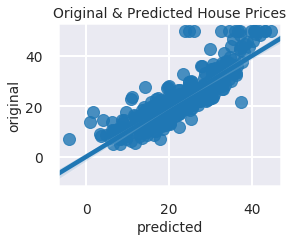

In [ ]:
plt.figure(figsize=(4,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=lm.predict(X), y=bos['PRICE'], scatter=True, fit_reg = True)
plt.title("Original & Predicted House Prices", fontsize='xx-small')
plt.xlabel("predicted", fontsize='xx-small')
plt.ylabel("original", fontsize='xx-small')

<br>
<br>

**Exercise:** We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

**Response**

* statsmodels: Provides quite a wide range of statistical measures, e.g., $R^{2}$, Adjusted $R^{2}$, F-Statistic, the F-Statistic *p-value*, the standard error of each estimated coefficient, the statistical significance of a predictor, etc.

* scikit-learn: It does not provide most of the statistics provided by statsmodel; the $R^{2}$ value can be evaluated via ```LinearRegression.score(self, X, y[, sample_weight])```.   However, it does provide the rank of the data matrix and its singular values, these are important tools for assessing the independence of predictors or for identify multicollinearity.

<br>
<br>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [ ]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


<br>
<br>

### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [ ]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837064256


<br>
<br>

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

<br>
<br>

### Evaluating the Model: Mean Squared Error and the $F$-Statistic

The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<br>
<br>

### Part 3 Checkup Exercise Set IV

Let's look at the relationship between `PTRATIO` and housing price.

* **Exercise:** Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

* **Exercise:** Calculate (or extract) the $R^2$ value. What does it tell you?

* **Exercise:** Compute the $F$-statistic. What does it tell you?

* **Exercise:** Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

<br>
<br>

**Preliminaries**

Calculations via statsmodel

In [ ]:
psm = ols('PRICE ~ PTRATIO',bos).fit()
print(psm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           1.61e-34
Time:                        00:58:30   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Calculations via scikit-learn

In [ ]:
# LinearRegression Object
pskl = LinearRegression()

# PTRATIO Values
P = bos[['PTRATIO']]

# Using predictor PTRATIO to fit a linear regression model
pskl.fit(P, bos.PRICE)

# The intercept
print('Estimated intercept coefficient: {:.4f}'.format(pskl.intercept_))

# The coefficient
print(f"Estimated PTRATIO coefficient {pskl.coef_.take(0):.4f}")

# R^2
print(f"R^{2}: {pskl.score(P, bos['PRICE']):.4f}")

Estimated intercept coefficient: 62.3446
Estimated PTRATIO coefficient -2.1572
R^2: 0.2578


Calculations based on theory: As a supplement to using scikit-learn.

In [ ]:
# RSS & ESS
RSSP = np.sum(( bos.PRICE - pskl.predict(P) ) ** 2)
ESSP = np.sum(( pskl.predict(P) - np.mean(bos.PRICE) ) ** 2)

# The number of variables: PTRATIO only
K = 1

# The number of observations
N = bos.shape[0]

# R^2
R2P = ESSP/(RSSP + ESSP)
print(f"Calculated R^{2}: {R2P:.4f}")

# Adjusted R^2
R2PADJ = R2P - (1 - R2P)*K/(N - K - 1)
print(f"Calculated R^{2} Adjusted: {R2PADJ:.4f}")

# Hence, the F-Statistic
FPT = (1/K)*(N - K - 1)*R2P/(1 - R2P)
print(f"Calculated F-Statistic: {FPT:.4f}")

Calculated R^2: 0.2578
Calculated R^2 Adjusted: 0.2564
Calculated F-Statistic: 175.1055


<br>

**Response: Intercept & Coefficients**

A single point increase in pupil/teacher ratio leads to a ```~$2,157``` decrease in price.  And, as the pupil/teacher ratio approaches zero, the house price approaches a maximum of ```~$62,344```, i.e., the intercept value.  Additionally, the statsmodel summary indicates that pupil/teacher ratio is a statistically significant predictor of house prices.

<br>

**Response: $R^{2}$**

The $R^{2}$ value indicates that approximately 25% of house price variance might be due to pupil/teacher ratio levels. 

<br>

**Response: $F$-statistic**

The $F$-statistic of $175.105$, with p-value $1.610e$-34, indicates that the model is statistically significant.  The $F$-statistic roughly indicates the ratio of explained variation to unexplained variation, hence we would like it to increase.

<br>

**Response: $F$-Statistic & $t$-statistic**

In this case

$$F = t^{2}$$

wherein $F$ denotes the $F$-statistic and $t$ denotes the t-statistic.  This is in line with the posit 

```
in the case of a simple, single predictor, regression model the F-statistic is the square of the t-statistic.
```


<br>
<br>

### Part 3 Checkup Exercise Set V

* **Exercise:** Fit a linear regression model using three independent variables

  * 'CRIM' (per capita crime rate by town)
  * 'RM' (average number of rooms per dwelling)
  * 'PTRATIO' (pupil-teacher ratio by town)


* **Exercise:** Compute or extract the $F$-statistic. What does it tell you about the model?

* **Exercise:** Compute or extract the $R^2$ statistic. What does it tell you about the model?

* **Exercise:** Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

<br>
<br>

**Preliminaries**

Calculations via statsmodel

In [ ]:
# CRIM, RM, PTRATIO
three = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(three.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           6.15e-98
Time:                        00:58:31   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

<br>
<br>

**Response: $F$-statistic**

The $F$-statistic, especially in relation to the single predictor model of **Part 3 Checkup Exercise Set IV**, illustrates that the addition of the two extra predictors, i.e., the addition of CRIM & RM, has improved the model - the $F$-statistic has increased, and the new model is statistically significant, as indicated by the $p$-value of the $F$-statistic: $6.15e^{-98}$.  [In **Part 3 Checkup Exercise Set IV** the model's predictor is PTRATIO]

<br>
<br>

**Response: $R^{2}$**

The $R^{2}$ value indicates that approximately $59$% of house price variation might be explained by the predictors CRIM, RM, & PTRATIO.

<br>
<br>

**Response: Estimated Coefficients**

Each of the predictors is a statistically significant predictor of house prices.  A unit increase in crime rate per capita (CRIM) or pupil/teacher ratio (PTRATIO) leads to a fall in house price.  Whereas, a unit increase in average number of rooms per dwelling (RM) increases a house price.

Coefficient | Effect of a 1 unit increase on the price of a house
--- | --- 
crime rate per capita (CRIM) | ~$\$205$ decrease
number of rooms per dwelling (RM) | ~$\$7,380$ increase
pupil/teacher ratio (PTRATIO) | ~$\$1,069$ decrease 


As the table illustrates, RM does have quite a positive monetary impact.  The effect of crime rate per capita seems relatively small.


<br>
<br>

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<br>
<br>

### Part 4 Checkup Exercises

<div class="span5 alert alert-info">
<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [ ]:
# CRIM, RM, PTRATIO, LSTAT
four = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(four.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          5.84e-123
Time:                        00:58:31   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

<br>
<br>

**Response: Model Comparison**

Predictors | $F$-Statistic | $F$-Statistic $p$-value | AIC 
--- | --- | --- | ----
CRIM, RM, PTRATIO | 245.164 | $6.15e$-98 | 3231.945
CRIM, RM, PTRATIO, LSTAT | 267.990 | $5.84e$-123 | 3111.561
 | | |

The four predictors model is the better model because

* the $F$-statistic has increased; the $F$-Statistic $p$-value indicates that the model is statistically significant.
* the AIC value has decreased.


<br>
<br>

## Part 5: Evaluating the Model via Model Assumptions and Other Issues

<br>

Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

* **Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.

* **Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.

* **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>

* **Independent errors**.  The observations are assumed to be obtained independently, e.g. Observations across time may be correlated.

<br>

There are some other issues that are important investigate with linear regression models.


* **Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
* **Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.

<br>
<br>

### Part 5 Checkup Exercises

Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
    
* **Exercise:** Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

* **Exercise:** Construct a quantile plot of the residuals. What does the plot tell you?

* **Exercise:** What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

* **Exercise:** Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

* **Exercise:** Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

* **Exercise:** Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

<br>
<br>

**Response: Residuals & Fitted Values**

The graph below illustrates a violation of the constant variance requirement; funnel shaped pattern instead of patternless.

Text(0, 0.5, 'Residuals')

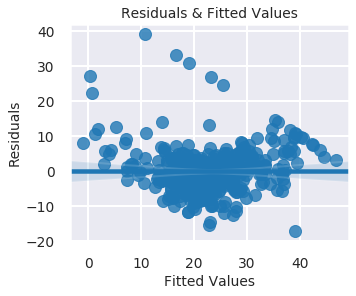

In [ ]:
plt.figure(figsize=(5,4))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=three.fittedvalues, y=three.resid, scatter=True, fit_reg = True)
plt.title("Residuals & Fitted Values", fontsize='xx-small')
plt.xlabel("Fitted Values", fontsize='xx-small')
plt.ylabel("Residuals", fontsize='xx-small')

<br>
<br>

**Response: Quantile-Quantile Plot**

The quantile-quantile plot below, which is a normal probability plot,  illustrates that the residuals can't be described as normally distributed because a number of points veer-off the $45^{o}$ diagonal.  These points can be described as outliers.


Text(0, 0.5, 'Sample Quantiles')

<Figure size 72x36 with 0 Axes>

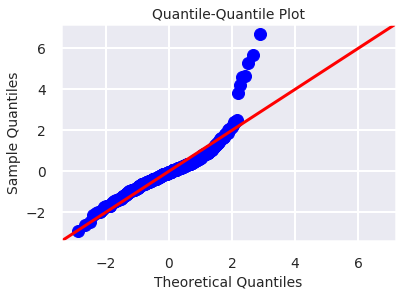

In [ ]:
plt.figure(figsize=(1,0.5))
sm.qqplot(three.resid, fit=True, line='45')
plt.tick_params(axis='both', labelsize='xx-small')
plt.title("Quantile-Quantile Plot", fontsize='xx-small')
plt.xlabel("Theoretical Quantiles", fontsize='xx-small')
plt.ylabel("Sample Quantiles", fontsize='xx-small')

<br>
<br>

**Response: Residuals/Predictions Plots & Quantile-Quantile Plots of Residuals**

A quantile-quantile plot of a data set visually illustrates a data set's  departure, or otherwise, from normality.  It also aids outlier detection.

On the other hand, a residuals/predictions graph allows us to visually assess the variance property of the residuals.

<br>
<br>

**Response: Outliers**

Outliers can be quantitatively detected via Studentized Residuals.  In the case of statsmodel's ordinary least squares (OLS) regression, these values can be calculated and classified - as outliers or otherwise - via an OLS result's ```outlier_test``` method.  This approach is used to determine the outliers w.r.t. the reduced model of Part 3, i.e. model ```three```.

The approach identified 6 outliers.  Five of them are 50,000USD houses, and what seems to differentiate them from other houses of the same price is their  full-value property-tax rate per 10,000USD (TAX).  Only these five 50,000USD houses have a TAX value of 666USD; this is the highest value amongst 50,000USD PRICE group.

```python
bos[bos['PRICE'] > 49]
```

```python
bos[bos['TAX'] > 665]
```

It is difficult to discern why the final outlier is an outlier.

In [ ]:
# Determining the outlier indices
significance_level = 0.05
outliers_three_det = three.outlier_test(method='bonf', alpha=significance_level, labels=None, order=False, cutoff=None)
outliers_three_init = outliers_three_det[outliers_three_det['bonf(p)'] < significance_level]
outliers_three_init.reset_index(level=0, inplace=True)
outliers_three = outliers_three_init.rename(columns={"index": "id"})
outliers_three

,id,student_resid,unadj_p,bonf(p)
0,365,4.797961,2.118084e-06,1.071751e-03
1,368,7.036931,6.493439e-12,3.285680e-09
2,369,4.669117,3.889705e-06,1.968191e-03
3,370,4.262646,2.414605e-05,1.221790e-02
4,371,5.432903,8.666085e-08,4.385039e-05
5,372,5.865813,8.126215e-09,4.111865e-06


In [ ]:
# extracting the ourliers records
oddities = bos.iloc[outliers_three.id]
oddities

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


Text(0, 0.5, 'Studentized Residuals')

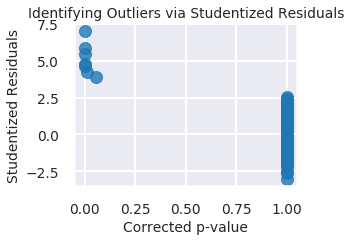

In [ ]:
plt.figure(figsize=(4,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=outliers_three_det['bonf(p)'], y=outliers_three_det['student_resid'], scatter=True, fit_reg=False)
plt.tick_params(axis='both', labelsize='xx-small')
plt.title("Identifying Outliers via Studentized Residuals", fontsize='xx-small')
plt.xlabel("Corrected p-value", fontsize='xx-small')
plt.ylabel("Studentized Residuals", fontsize='xx-small')

<br>
<br>

**Response: Leverage**

The leverage plot is illustrated below.  Subsequently, the high leverage points are printed via dataframe ```of_high_leverage```.  The high leverage points are distinguishable as points that have both

* high crime per capita rates
* high full-value property-tax rates per 10,000USD

as the CRIM/TAX graph illustrates; orange points.

<br>

Note: The influence & leverage plot methods

```python
sm.graphics.influence_plot(three, external=True, alpha=0.05, criterion='cooks', size=24, plot_alpha=0.75, ax=None, labels=None)
```

```python
sm.graphics.plot_leverage_resid2(three, alpha=0.05)
```

where not used because the point labels where obscuring.


**Influence Data**

The influence data, which includes the studentized residuals, leverage, and cook's distance values.

In [ ]:
influence_object = olsinf(three)
influence_data = influence_object.summary_frame()
influence_data.head()

,dfb_Intercept,dfb_CRIM,dfb_RM,dfb_PTRATIO,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.035140,0.000412,0.004115,0.049678,0.001045,-0.817854,0.006208,-0.064642,-0.817584,-0.064621
1,-0.003705,0.008572,-0.001235,0.004238,0.000199,-0.575202,0.002397,-0.028193,-0.574819,-0.028174
2,-0.025394,-0.005671,0.037987,0.006262,0.000653,0.697322,0.005347,0.051126,0.696965,0.051100
3,-0.036905,-0.012698,0.042049,0.022197,0.000911,0.875186,0.004736,0.060373,0.874982,0.060359
4,-0.059036,-0.015171,0.068097,0.033309,0.001991,1.167191,0.005811,0.089234,1.167614,0.089266


**Leverage Plot**

Text(0, 0.5, 'Leverage')

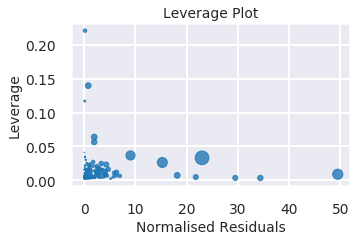

In [ ]:
# Influence Plot
# plt.figure(figsize=(4,3))
# plt.tick_params(axis='both', labelsize='xx-small')
# sns.regplot(x=influence_data.hat_diag, y=influence_data.student_resid, scatter=True, fit_reg=False, scatter_kws={'s': 1000*influence_data.cooks_d})
# plt.tick_params(axis='both', labelsize='xx-small')
# plt.title("Influence Plot", fontsize='xx-small')
# plt.xlabel("H Leverage", fontsize='xx-small')
# plt.ylabel("Studentized Residuals", fontsize='xx-small')

# Leverage Plot
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=influence_data.student_resid**2, y=influence_data.hat_diag, scatter=True, fit_reg=False, scatter_kws={'s': 1000*influence_data.cooks_d})
plt.tick_params(axis='both', labelsize='xx-small')
plt.title("Leverage Plot", fontsize='xx-small')
plt.xlabel("Normalised Residuals", fontsize='xx-small')
plt.ylabel("Leverage", fontsize='xx-small')

In [ ]:
of_high_leverage = influence_data[influence_data.hat_diag >= 0.05]
of_high_leverage

,dfb_Intercept,dfb_CRIM,dfb_RM,dfb_PTRATIO,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
380,-0.024896,0.220433,0.056969,-0.025819,0.012558,0.421333,0.220554,0.224125,0.420988,0.223941
405,0.006071,0.126452,0.006301,-0.020662,0.004146,0.353878,0.116949,0.128783,0.353569,0.128671
410,0.013227,0.355592,0.014385,-0.046489,0.033519,1.401601,0.063889,0.366161,1.402952,0.366514
414,0.111967,0.295909,-0.113389,-0.074649,0.029396,1.401732,0.056465,0.342908,1.403084,0.343238
418,0.001694,0.356404,0.038088,-0.054241,0.032546,0.895820,0.139582,0.360811,0.895644,0.360740


In [ ]:
bos_lev = bos.iloc[of_high_leverage.index]
bos_lev

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


Text(0, 0.5, 'crime rate per capita (CRIM)')

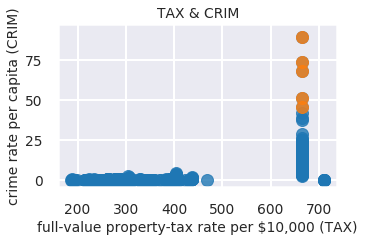

In [ ]:
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=bos['TAX'], y=bos['CRIM'], scatter=True, fit_reg=False)
sns.regplot(x=bos_lev['TAX'], y=bos_lev['CRIM'], scatter=True, fit_reg=False)
plt.title("TAX & CRIM", fontsize='xx-small')
plt.xlabel("full-value property-tax rate per $10,000 (TAX)", fontsize='xx-small')
plt.ylabel("crime rate per capita (CRIM)", fontsize='xx-small')

<br>
<br>

**Response: Excluding Outliers & High Leverage Points**

In this case the leverage plot is used to exclude both outliers and high leverage points.   Hence, instead of excluding outliers via the $p$-values of the studentized test, the outliers are excluded via normalised residuals.

<br>

The reduced data set has 493, instead of 506, observations.  The statsmodel report is printed further below.  The reduced data set led to a much better model, as the comparison with previous models illustrates (in the table below reduced means outliers & high leverage points have been excluded).

<br>

Data Set | Predictors | $F$-Statistic | $F$-Statistic $p$-value | AIC | $R^{2}$ Adjusted
--- | --- | --- | --- | ---- | ----
Full | CRIM, RM, PTRATIO | 245.164 | $6.15e$-98 | 3231.945 | 0.59
Full | CRIM, RM, PTRATIO, LSTAT | 267.990 | $5.84e$-123 | 3111.561 | 0.68
Reduced | CRIM, RM, PTRATIO | 445.148 | $2.34e$-139 | 2899.515 |  0.73

<br>

The model based on the reduced data set has

* the lowest AIC value thus far. 
* an adjusted $R^{2}$ value that indicates that 73% of house price variation might be due to its three predictors; this model has the highest adjusted $R^{2}$ value thus far.  
* the highest $F$-statistic value thus far; the $p$-value indicates that the model is statistically significant.

Finally, each of the predictors is a statistically significant predictor of house prices, as indicated by the statsmodel report further below.  The latest effect of a predictor unit increase is summarised in the table below.  [Note: Compared to the three predictors model based on the full data set, the absolute effects of CRIM and RM have increased, whilst that of PTRATIO has decreased.]

Coefficient | Effect of a 1 unit increase on the price of a house
--- | --- 
crime rate per capita (CRIM) | ~$\$320$ decrease
number of rooms per dwelling (RM) | ~$\$8,183$ increase
pupil/teacher ratio (PTRATIO) | ~$\$1,037$ decrease


<br>

**Outliers Exclusion**

Text(0, 0.5, 'Leverage')

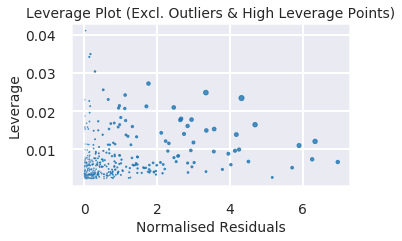

In [ ]:
Z = influence_data[ (influence_data.hat_diag < 0.05) & (influence_data.student_resid**2 < 9)]
plt.figure(figsize=(5,3))
plt.tick_params(axis='both', labelsize='xx-small')
sns.regplot(x=Z.student_resid**2, y=Z.hat_diag, scatter=True, fit_reg=False, scatter_kws={'s': 1000*Z.cooks_d})
plt.tick_params(axis='both', labelsize='xx-small')
plt.title("Leverage Plot (Excl. Outliers & High Leverage Points)", fontsize='xx-small')
plt.xlabel("Normalised Residuals", fontsize='xx-small')
plt.ylabel("Leverage", fontsize='xx-small')

In [ ]:
bos_reduced = bos.iloc[Z.index]

<br>

**New Model**

In [ ]:
# CRIM, RM, PTRATIO
three_reduced = ols('PRICE ~ CRIM + RM + PTRATIO', bos_reduced).fit()
print(three_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     445.1
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          2.34e-139
Time:                        00:58:34   Log-Likelihood:                -1445.8
No. Observations:                 493   AIC:                             2900.
Df Residuals:                     489   BIC:                             2916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1148      3.261     -2.795      0.0

## Requirements

In [ ]:
# !pip install pipreqs

import pip
import pipreqs
import subprocess

ModuleNotFoundError: ignored

<br>

Via pip freeze

In [ ]:
# !pip freeze > requirements.txt

subprocess.Popen(['pip3', 'freeze', '--local'], stdout=open('requirements.txt', 'w'))

In [ ]:
f = open("requirements.txt", "r")
if f.mode == "r":
  contents = f.read()
  print(contents)
f.close()

<br>

Via pipreqs

In [ ]:
# !pipreqs --force .

subprocess.Popen(['pipreqs', '--force'], stdout=open('requirements.txt', 'w'))

In [ ]:
f = open("requirements.txt", "r")
if f.mode == "r":
  contents = f.read()
  print(contents)
f.close()